Франков Олексій, ПС-4 (ФКНК КНУ)

Датасет був взятий звідси:https://www.kaggle.com/datasets/rukenmissonnier/final-house

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("house.csv")

# Попередній аналіз даних

In [3]:
data.head()

bedroom_count    net_sqm  center_distance  metro_distance  floor  age  \
0              1  26.184098          1286.68      204.003817     22   67   
1              1  34.866901          1855.25      186.980360      8   30   
2              1  36.980709           692.09      111.224999     24   24   
3              1  17.445723          1399.49      237.998760      1   66   
4              1  52.587646            84.65      100.996400     20    3   

          price  
0  96004.804557  
1  92473.722568  
2  98112.519942  
3  92118.326874  
4  98976.653176

In [4]:
data.describe()

bedroom_count      net_sqm  center_distance  metro_distance  \
count    4308.000000  4308.000000      4308.000000     4308.000000   
mean        3.732823   118.941327      1090.544301      105.665358   
std         2.476989    95.469802       555.325830       60.750825   
min         1.000000    10.244518        11.800000        1.245338   
25%         2.000000    52.240659       635.897500       56.156897   
50%         3.000000    91.828201      1143.135000      101.388012   
75%         5.000000   150.987591      1554.280000      148.481068   
max        17.000000   750.971604      1999.840000      330.275317   

             floor          age          price  
count  4308.000000  4308.000000    4308.000000  
mean      9.397168    48.576834   95701.196185  
std       7.517018    27.621465    3919.823988  
min       1.000000     0.000000   86113.592974  
25%       2.000000    25.000000   92934.251436  
50%       8.000000    48.000000   95337.792918  
75%      16.000000    72.000000   97980.675094  
max      24.000000    97.000000  118134.771190

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [6]:
#перевіряємо наявність пропущених значень
data.isnull().sum().any()

False

Пропущених значень немає

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

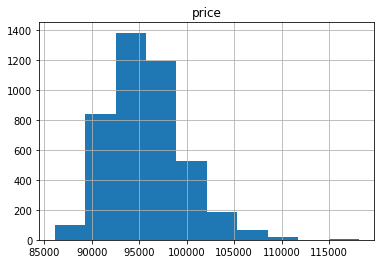

In [7]:
#будуємо гістограму для змінної price
data.hist(column = "price")

In [8]:
#будуємо гістограму для змінної net_sqm
data.hist(column = "net_sqm")

array([[<AxesSubplot:title={'center':'net_sqm'}>]], dtype=object)

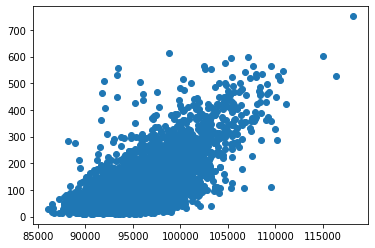

In [9]:
#будуємо діаграму розсіювання для змінних price та net_sqm
plt.scatter(data["price"], data["net_sqm"])

In [10]:
#виводимо матрицю кореляції
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

Створюємо просту лінійну регресійну модель: price - залежна, а net_sqm - незалежна змінна

# SciKit learn

In [11]:
x = data[["net_sqm"]]
y = data[["price"]]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#розбиваємо вибірку на тренувальну та тестову
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1) 

In [14]:
#вчимо модель та застосовуємо на тестових даних
model = LinearRegression()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [15]:
#виводимо графік
plt.scatter(Xtrain, ytrain, color = 'green')
plt.scatter(Xtest, ytest, color = 'orange')
plt.plot(Xtest, y_model, color = 'red');

plt.legend(('train', 'test', 'model'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [16]:
#Обчислюємо коефіцієнт детермінації
from sklearn.metrics import mean_squared_error, r2_score
r_sq = r2_score(ytest, y_model)
print(f"coefficient of determination: {r_sq}")

#MSE
print(f"MSE: {mean_squared_error(ytest, y_model)}")

coefficient of determination: 0.4658086182940695
MSE: 8101776.843007766


# XGBoost

In [17]:
from xgboost import XGBRegressor

In [18]:
#вчимо модель та застосовуємо на тестових даних
model1 = XGBRegressor(booster='gblinear')
model1.fit(Xtrain, ytrain)
y_model1 = model1.predict(Xtest)

In [19]:
#виводимо графік
plt.scatter(Xtrain, ytrain, color = 'green')
plt.scatter(Xtest, ytest, color = 'orange')
plt.plot(Xtest, y_model1, color = 'red');

plt.legend(('train', 'test', 'model'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [20]:
#Обчислюємо коефіцієнт детермінації
r_sq = r2_score(ytest, y_model1)
print(f"coefficient of determination: {r_sq}")

#MSE
print(f"MSE: {mean_squared_error(ytest, y_model1)}")

coefficient of determination: 0.4658085914225947
MSE: 8101777.25055214


На налаштуваннях по замовчуванню модель XGBOOST показала гірші результати

# Ансамблювання Sklearn

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
#вчимо модель та застосовуємо на тестових даних
model3 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=1, random_state=1, 
                                   loss='squared_error').fit(Xtrain, ytrain.values.ravel())
y_model3 = model3.predict(Xtest)

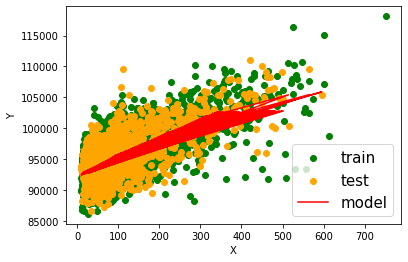

In [23]:
#виводимо графік
plt.scatter(Xtrain, ytrain, color = 'green')
plt.scatter(Xtest, ytest, color = 'orange')
plt.plot(Xtest, y_model3, color = 'red');

plt.legend(('train', 'test', 'model'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [24]:
#Обчислюємо коефіцієнт детермінації
r_sq = r2_score(ytest, y_model3)
print(f"coefficient of determination: {r_sq}")

#MSE
print(f"MSE: {mean_squared_error(ytest, y_model3)}")

coefficient of determination: 0.4618313155109698
MSE: 8162098.332064446


Результати кращі, ніж у другої моделі, але гірші за першу.